# 1. Load the dataset

In [1]:
#import the required libraries
import numpy as np  
import seaborn as sns 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats

In [2]:
import pandas as pd
df = pd.read_csv("/kaggle/input/cuschurndataset/Customer_churn_dataset.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.shape

(7043, 21)

# 2. DATA CLEANING
## 2.1 Xử lý giá trị null

In [4]:
null_values = df.isnull().sum()
print("Số lượng giá trị null cho mỗi cột: ")
print(null_values)

Số lượng giá trị null cho mỗi cột: 
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


## 2.2 Xử lý giá trị trùng lặp

In [5]:
duplicate_values = df.duplicated()
print("Số lượng giá trị trùng lặp:", duplicate_values.sum())

Số lượng giá trị trùng lặp: 0


## 2.3 Xác định tên các cột và kiểu dữ liệu 

In [6]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [7]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

## 2.4 Phân tích thống kê mô tả

In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


## 2.5 Xử lý biến mục tiêu Churn
### a. Đếm số giá trị Yes và No 

In [9]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

### b. Trực quan hóa 

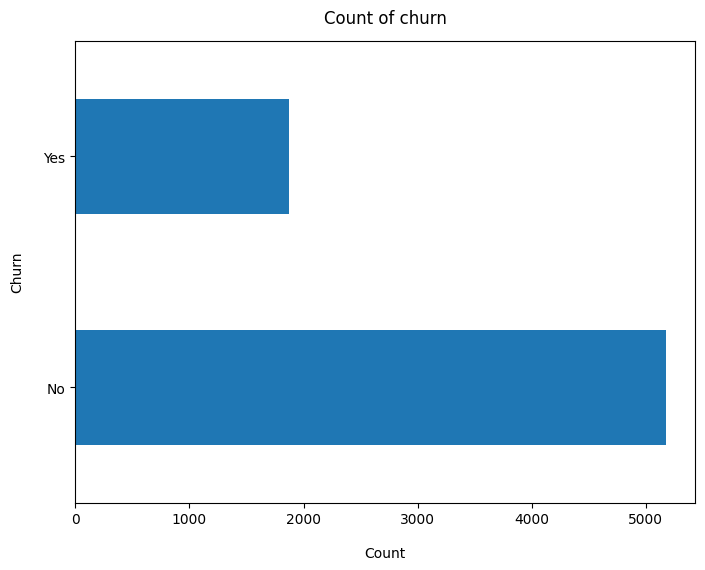

In [10]:
df['Churn'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Churn", labelpad=14)
plt.title("Count of churn", y=1.02);

### c. Tỉ lệ phần trăm 

In [11]:
100*df['Churn'].value_counts()/len(df['Churn'])

Churn
No     73.463013
Yes    26.536987
Name: count, dtype: float64

### d. Tách biệt Numerical and Categorical feature

In [12]:
# numerical feature
numerical_feature = {feature for feature in df_copy.columns if df_copy[feature].dtypes != 'O'}
print(f'Count of Numerical feature: {len(numerical_feature)}')
print(f'Numerical feature are:\n {numerical_feature}')

NameError: name 'df_copy' is not defined

In [ ]:
# Categorical feature
categorical_feature = {feature for feature in df_copy.columns if df_copy[feature].dtypes == 'O'}
print(f'Count of Categorical feature: {len(categorical_feature)}')
print(f'Categorical feature are:\n {categorical_feature}')

## 2.6 Dữ liệu bị thiếu (Missing Data)

In [ ]:
missing = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot(x='index',y=0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

In [ ]:
df_copy.TotalCharges = pd.to_numeric(df_copy.TotalCharges, errors='coerce')
df_copy.isnull().sum()

In [ ]:
df_copy.loc[df_copy ['TotalCharges'].isnull() == True]

### a. Thay NaN với giá trị trung bình 

In [ ]:
# replace NaN values with mean value
df_copy.TotalCharges = df_copy.TotalCharges.fillna(df_copy.TotalCharges.median())

In [ ]:
df_copy.TotalCharges.hist()

### b. Loại bỏ cột không cần thiết

In [ ]:
df_copy.drop(columns= ['customerID'], axis=1, inplace=True)
df_copy.head()

# 3. DATA EXPLORATION

In [ ]:
### Vẽ biểu đồ đặc trưng số với phân bố xác suất và kiểm tra ngoại lệ
for feature in numerical_feature:
    if feature != 'SeniorCitizen':
        plt.figure(figsize=(15,7))
    
        plt.subplot(1, 3, 1)
        sns.histplot(data=df_copy, x=feature, bins=30, kde=True)
        plt.title('Histogram')
    
        plt.subplot(1, 3, 2)
        stats.probplot(df_copy[feature], dist="norm", plot=plt)
        plt.ylabel('RM quantiles')
    
        plt.subplot(1, 3, 3)
        sns.boxplot(x=df_copy[feature])
        plt.title('Boxplot')
    
plt.show()

Sau khi vẽ biểu đồ phân phối xác suất biểu đồ và biểu đồ hộp để tìm giá trị số có phân bố chuẩn và tập dữ liệu của chúng tôi không có tập dữ liệu ngoại lệ. Vì vậy, chúng tôi không muốn xóa ngoại lệ trong tập dữ liệu của mình

In [ ]:
sns.pairplot(df_copy.drop(columns='SeniorCitizen'),hue='Churn', kind='scatter')
plt.show()

In [ ]:
# pie chart for Count of Senior citizens
ax = (df_copy['SeniorCitizen'].value_counts()*100.0 /len(df_copy)).plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )                                                                           
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Senior Citizens',fontsize = 12)
ax.set_title('% of Senior Citizens', fontsize = 12)

Chỉ 16,2% khách hàng là người cao tuổi nhưng 83,8% khách hàng còn lại là giới trẻ

## 3.1 Biểu đồ phân phối các yếu tố dự đoán riêng lẻ theo tỷ lệ rời bỏ

In [ ]:
for i, feature in enumerate(categorical_feature):
    if feature != 'TotalCharges':
        if feature != 'customerID':
            plt.figure(i)
            plt.figure(figsize=(12,6))
            sns.countplot(data=df_copy, x=feature, hue='Churn')
plt.show()

## 3.2 Chuyển đổi kiểu dữ liệu cột Churn

In [ ]:
df_copy['Churn'] = np.where(df_copy.Churn == 'Yes',1,0)
df_copy.head()

## 3.3 Tạo biến giả

In [ ]:
df_copy_dummies = pd.get_dummies(df_copy)
df_copy_dummies.head()

## 3.4 Mối quan hệ giữa Monthly Charges và Total Charges

In [ ]:
sns.lmplot(data=df_copy_dummies, x='MonthlyCharges', y='TotalCharges', 
           fit_reg=False)

Total Charges increase as Monthly Charges increase - as expected.

### a. Chi trả hàng tháng theo tỷ lệ rời bỏ

In [ ]:
Mth=sns.kdeplot(df_copy_dummies.MonthlyCharges[(df_copy_dummies["Churn"] == 0)],
                color="Red", shade = True)
Mth=sns.kdeplot(df_copy_dummies.MonthlyCharges[(df_copy_dummies["Churn"] == 1)],
                ax =Mth, color="Blue", shade= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')

**Insight:** Churn cao khi Monthly Charges cao

### b. Tổng chi trả theo tỷ lệ rời bỏ

In [ ]:
Mth=sns.kdeplot(df_copy_dummies.TotalCharges[(df_copy_dummies["Churn"] == 0)],
                color="Red", shade = True)
Mth=sns.kdeplot(df_copy_dummies.TotalCharges[(df_copy_dummies["Churn"] == 1)],
                ax =Mth, color="Blue", shade= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Total Charges')
Mth.set_title('Total charges by churn')

Tỷ lệ rời bỏ cao hơn với Tổng chi phí thấp hơn

Tuy nhiên, nếu kết hợp thông tin chuyên sâu về 3 thông số, Thời hạn, Phí hàng tháng & Tổng phí thì bức tranh sẽ hơi rõ ràng: - Phí hàng tháng cao hơn ở thời hạn sử dụng thấp hơn sẽ dẫn đến Tổng phí thấp hơn. Do đó, tất cả 3 yếu tố này bao gồm **Phí hàng tháng cao hơn**, **Quyền sử dụng thấp hơn** và **Tổng phí thấp hơn** đều được liên kết với ** Tỷ lệ rời bỏ cao**.

## 3.5 Xây dựng mối quan hệ của các yếu tố dự đoán với tỷ lệ rời bỏ

In [ ]:
plt.figure(figsize=(20,8))
df_copy_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

## 3.6 Heatmap

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(df_copy_dummies.corr(), cmap="RdBu")